In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from plotnine import *

In [3]:
ames = pd.read_csv("C:\\Users\\Tyler Clyde\\Documents\\GSB 544\\AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()

In [4]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

In [5]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([-6.56555978e+15, -2.64905382e+19, -5.64058062e+17, -2.70451581e+19,
       -1.03087837e+18])

In [6]:
lr_pipeline_fitted = lr_pipeline_1.fit(X, y)
lr_coef = lr_pipeline_fitted.named_steps['linear_regression'].coef_

Practice Activities

In [7]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha=1))]
)

In [8]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([0.89815807, 0.91744024, 0.79493606, 0.78522563, 0.91389818])

In [9]:
lr_pipeline_fitted = lr_pipeline_1.fit(X, y)
ridge_coef = lr_pipeline_fitted.named_steps['ridge_regression'].coef_

C:\Users\Tyler Clyde\AppData\Roaming\Python\Python311\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 238 rows containing missing values.


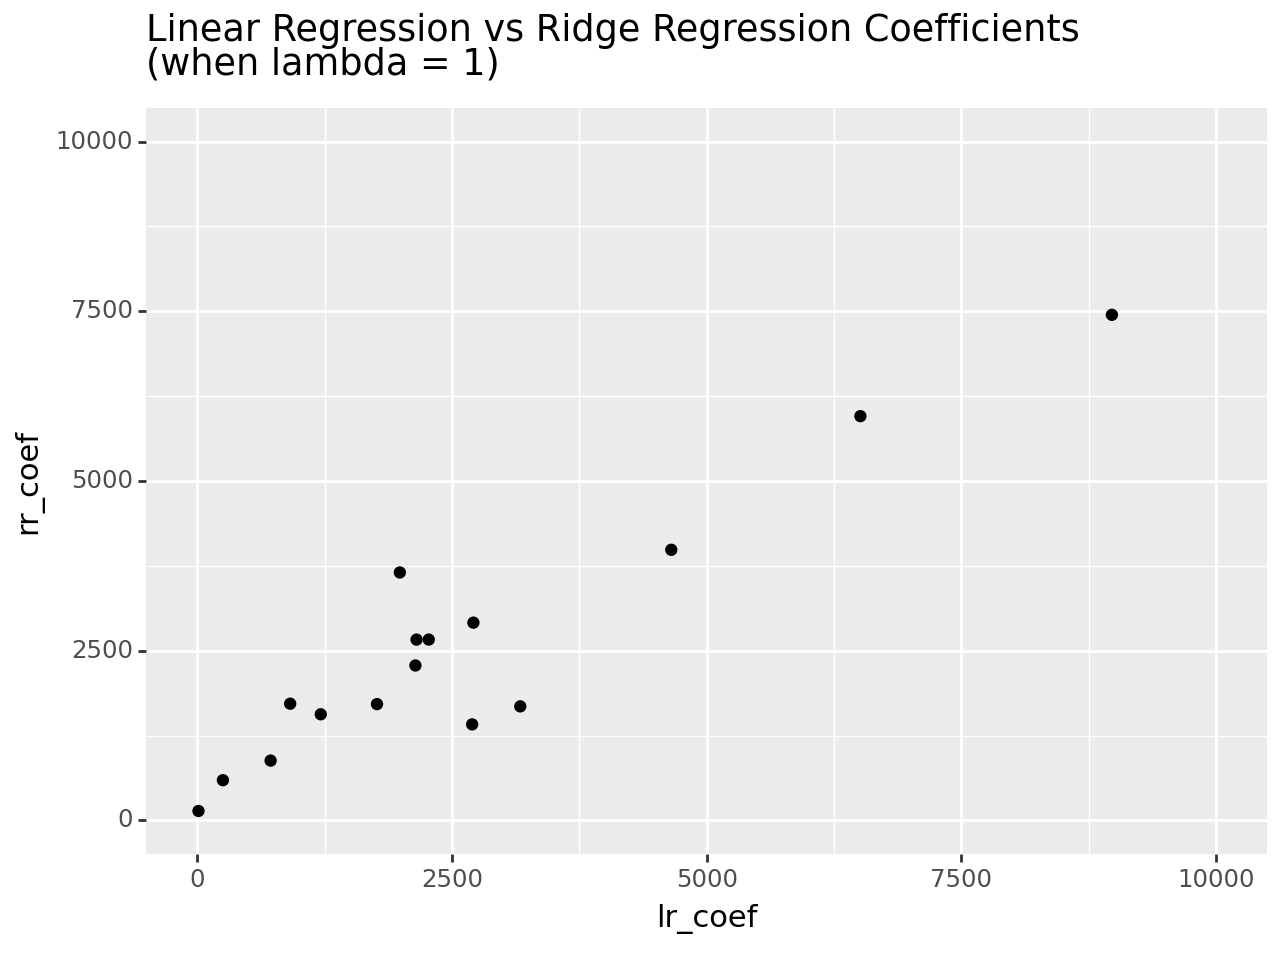

<Figure Size: (640 x 480)>

In [10]:
df = pd.DataFrame({
    'y': ridge_coef,
    'x': lr_coef
})

(ggplot(df, aes(x = 'x', y = 'y'))
 + geom_point()
 + scale_x_continuous(limits=(0, 10000))
 + scale_y_continuous(limits=(0, 10000))
 + labs(x = 'lr_coef', y = 'rr_coef', title = 'Linear Regression vs Ridge Regression Coefficients \n(when lambda = 1)')
)

In [11]:
from sklearn.model_selection import GridSearchCV

X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge())]
)

alpha = {'ridge_regression__alpha': [0.001,0.01,0.1,1,10,10000]}

gscv = GridSearchCV(lr_pipeline_1, alpha, cv = 5, scoring='r2')

In [12]:
gscv_fitted = gscv.fit(X, y)
pd.DataFrame(data = {"lambda": [0.001,0.01,0.1,1,10,10000], "scores": gscv_fitted.cv_results_['mean_test_score']})

,lambda,scores
0,0.001,0.853920
1,0.010,0.854186
2,0.100,0.856302
3,1.000,0.861932
4,10.000,0.864272
5,10000.000,0.692001


In [13]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha=10))]
)

cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

lr_pipeline_fitted = lr_pipeline_1.fit(X, y)
ridge_coef = lr_pipeline_fitted.named_steps['ridge_regression'].coef_

In [14]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso", Lasso())]
)

alpha = {'lasso__alpha': [0.001,0.01,0.1,1,10]}

gscv = GridSearchCV(lr_pipeline_1, alpha, cv = 5, scoring='r2')

In [15]:
gscv_fitted = gscv.fit(X, y)
pd.DataFrame(data = {"lambda": [0.001,0.01,0.1,1,10], "scores": gscv_fitted.cv_results_['mean_test_score']})

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+11, tolerance: 1.463e+09
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordina

,lambda,scores
0,0.001,0.855499
1,0.010,0.855606
2,0.100,0.856618
3,1.000,0.857152
4,10.000,0.860632


In [16]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso", Lasso(alpha=10))]
)

cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([0.90077569, 0.91506699, 0.80141962, 0.77664916, 0.90924976])

In [17]:
lr_pipeline_fitted = lr_pipeline_1.fit(X, y)
lasso_coef = lr_pipeline_fitted.named_steps['lasso'].coef_

C:\Users\Tyler Clyde\AppData\Roaming\Python\Python311\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 238 rows containing missing values.


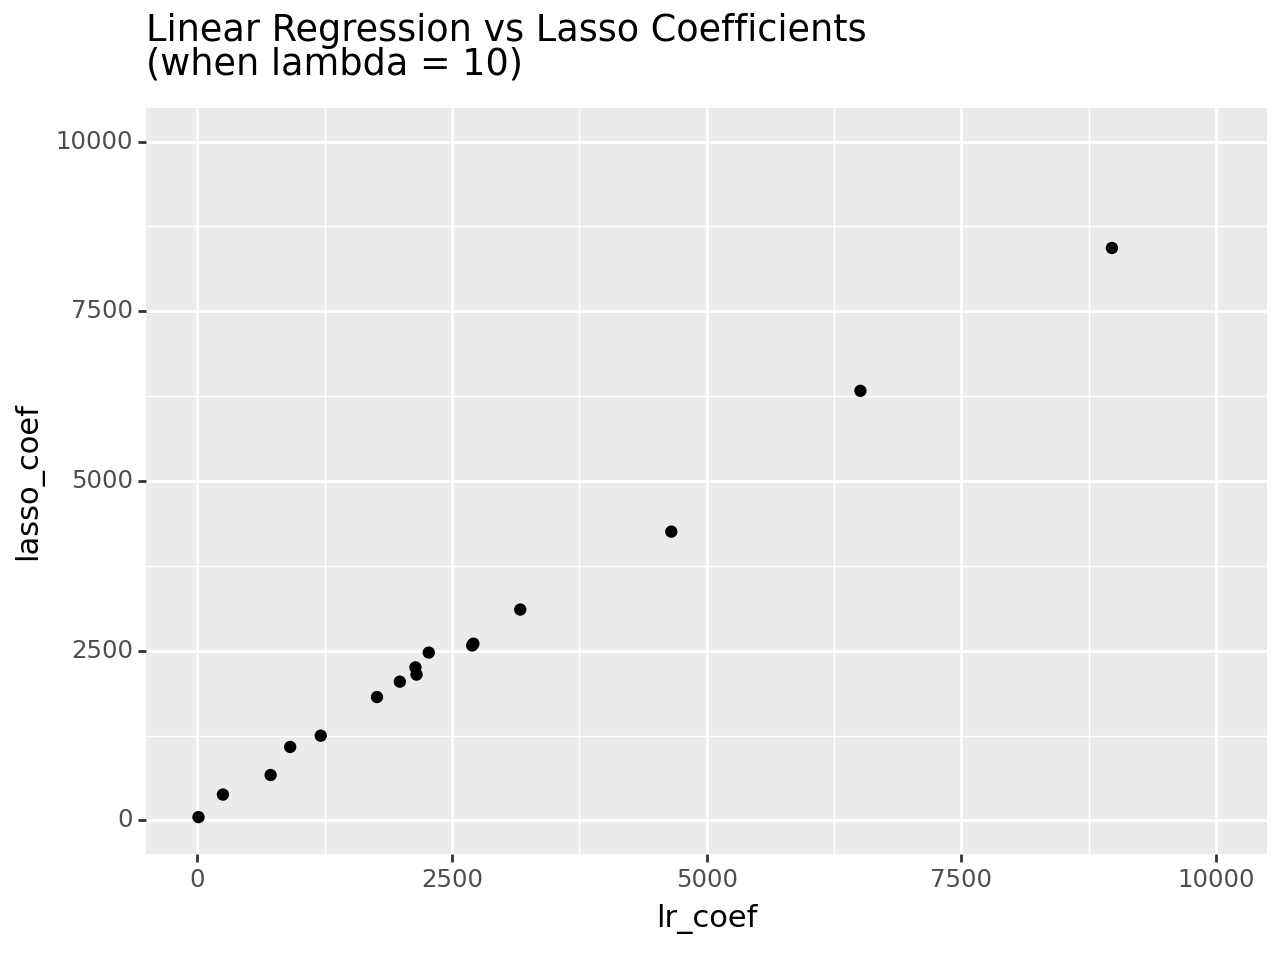

<Figure Size: (640 x 480)>

In [18]:
df = pd.DataFrame({
    'y': lasso_coef,
    'x': lr_coef
})

(ggplot(df, aes(x = 'x', y = 'y'))
 + geom_point()
 + scale_x_continuous(limits=(0, 10000))
 + scale_y_continuous(limits=(0, 10000))
 + labs(x = 'lr_coef', y = 'lasso_coef', title = 'Linear Regression vs Lasso Coefficients \n(when lambda = 10)')
)

C:\Users\Tyler Clyde\AppData\Roaming\Python\Python311\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 158 rows containing missing values.


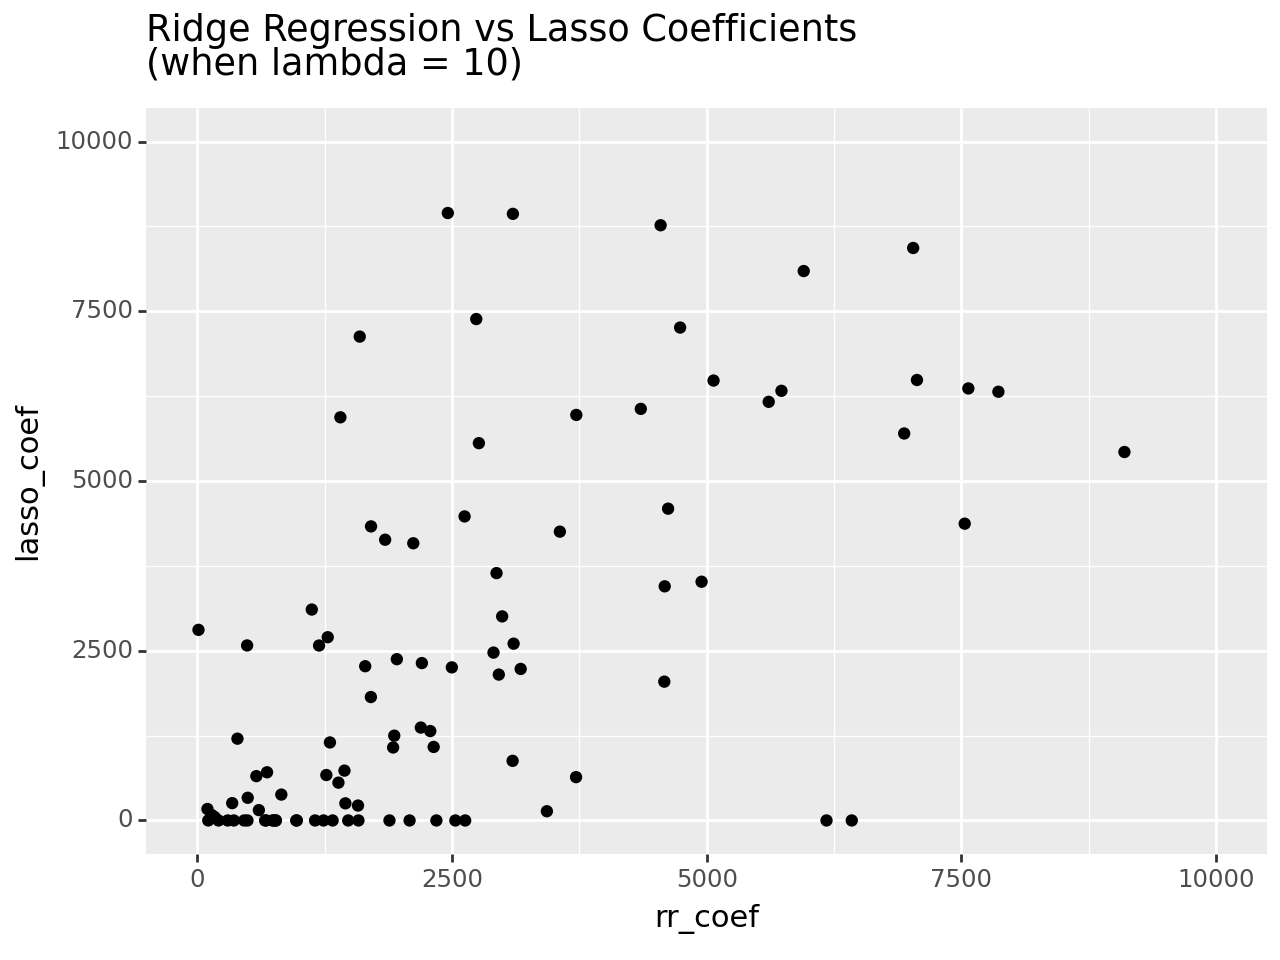

<Figure Size: (640 x 480)>

In [19]:
df = pd.DataFrame({
    'y': lasso_coef,
    'x': ridge_coef
})

(ggplot(df, aes(x = 'x', y = 'y'))
 + geom_point()
 + scale_x_continuous(limits=(0, 10000))
 + scale_y_continuous(limits=(0, 10000))
 + labs(x = 'rr_coef', y = 'lasso_coef', title = 'Ridge Regression vs Lasso Coefficients \n(when lambda = 10)')
)

In [31]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic", ElasticNet())]
)

param_grid = {
    'elastic__alpha': [0.001, 0.01, 0.1, 1, 10],
    'elastic__l1_ratio': [0.001, 0.01, 0.1, 1, 10]
}

gscv = GridSearchCV(lr_pipeline_1, param_grid, cv=5, scoring='r2')

In [32]:
gscv_fitted = gscv.fit(X, y)
pd.DataFrame(data = {"lambda": [0.001,0.01,0.1,1,10], "alpha": [0.001,0.01,0.1,1,10], "scores": gscv_fitted.cv_results_['mean_test_score']})

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.516e+11, tolerance: 1.348e+09
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.310e+11, tolerance: 1.474e+09
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.147e+11, tolerance: 1.463e+09
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordina

ValueError: All arrays must be of the same length

In [22]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic", ElasticNet(alpha= 10, l1_ratio= 1))]
)

In [33]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([0.84843362, 0.89484602, 0.78295991, 0.74618167, 0.88108029])

In [34]:
lr_pipeline_fitted = lr_pipeline_1.fit(X, y)
elastic_coef = lr_pipeline_fitted.named_steps['elastic'].coef_

C:\Users\Tyler Clyde\AppData\Roaming\Python\Python311\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 180 rows containing missing values.


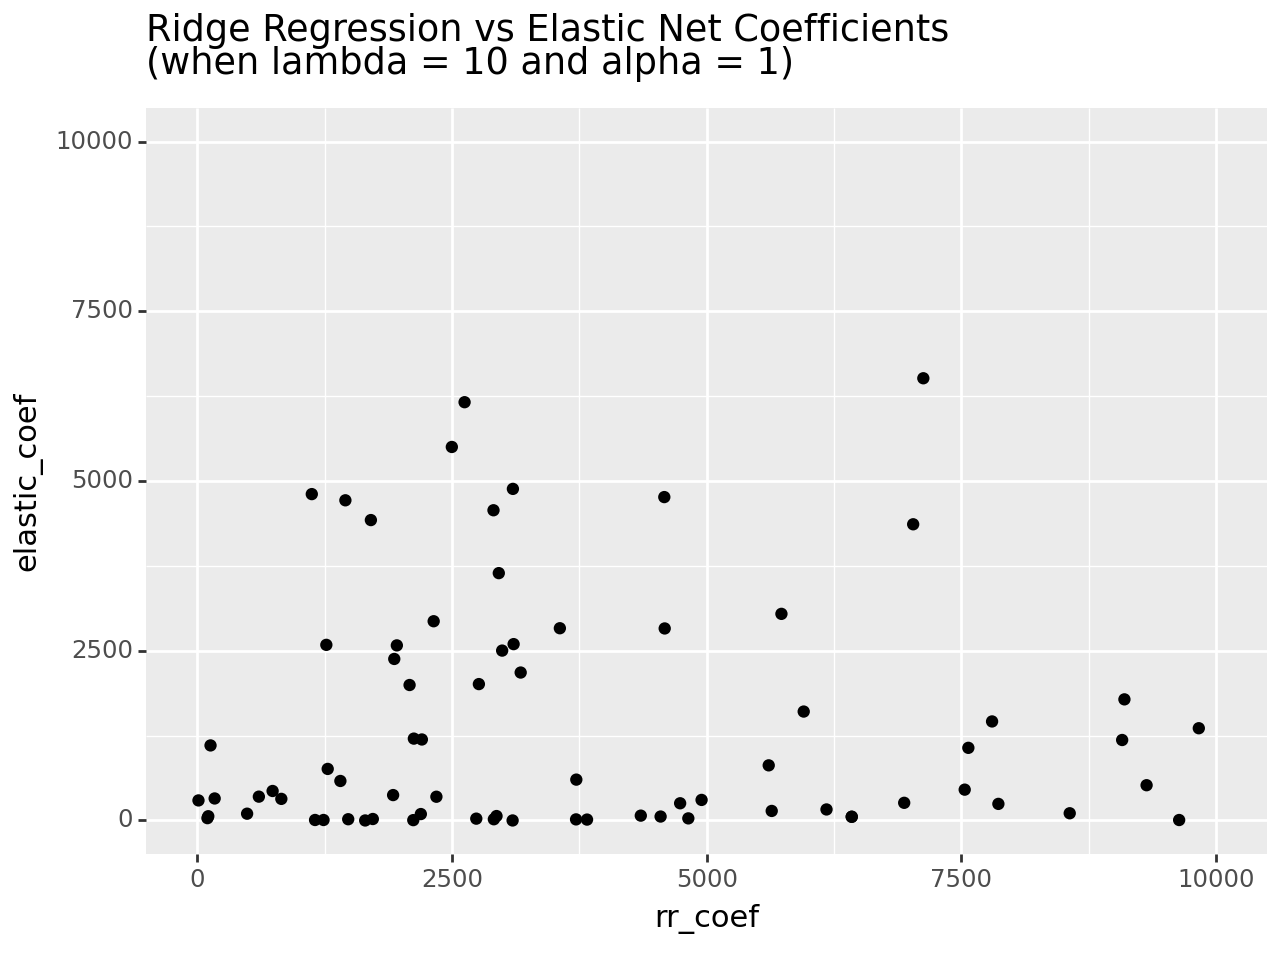

<Figure Size: (640 x 480)>

In [35]:
df = pd.DataFrame({
    'y': elastic_coef,
    'x': ridge_coef
})

(ggplot(df, aes(x = 'x', y = 'y'))
 + geom_point()
 + scale_x_continuous(limits=(0, 10000))
 + scale_y_continuous(limits=(0, 10000))
 + labs(x = 'rr_coef', y = 'elastic_coef', title = 'Ridge Regression vs Elastic Net Coefficients \n(when lambda = 10 and alpha = 1)')
)

C:\Users\Tyler Clyde\AppData\Roaming\Python\Python311\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 180 rows containing missing values.


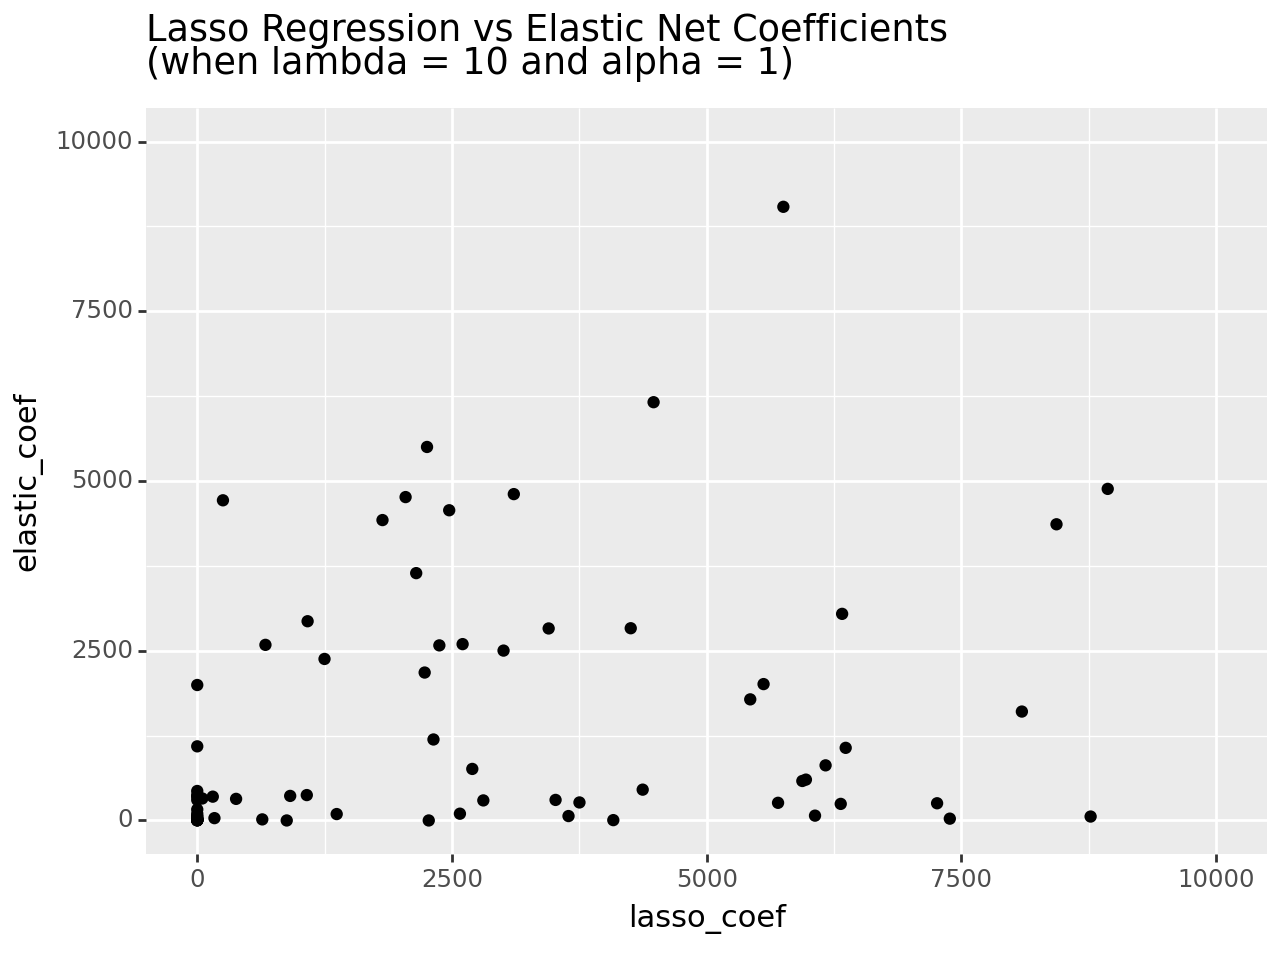

<Figure Size: (640 x 480)>

In [36]:
df = pd.DataFrame({
    'y': elastic_coef,
    'x': lasso_coef
})

(ggplot(df, aes(x = 'x', y = 'y'))
 + geom_point()
 + scale_x_continuous(limits=(0, 10000))
 + scale_y_continuous(limits=(0, 10000))
 + labs(x = 'lasso_coef', y = 'elastic_coef', title = 'Lasso Regression vs Elastic Net Coefficients \n(when lambda = 10 and alpha = 1)')
)